# Import libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read csv

In [4]:
df=pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')

C:\Users\ACER\AppData\Local\Temp\ipykernel_200\2904443999.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('TWO_CENTURIES_OF_UM_RACES.csv')


# Data cleaning and preparation

In [ ]:
# Show the first 5 rows of the dataset
df.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4


In [6]:
# Total number of rows and columns
df.shape 

(7461195, 13)

In [7]:
# Select India data only for analysis
df = df[df['Athlete country'] == 'IND'] 

In [8]:
# Total number of rows and columns after filtering India data
df.shape 

(16677, 13)

In [9]:
# Total number of unique event distances/lengths
len(df['Event distance/length'].unique()) 

215

In [10]:
# Check the frequencies of the event distances/lengths to remove outliers
df['Event distance/length'].value_counts() 

Event distance/length
50km      6008
12h       1757
100km      981
24h        911
60km       583
          ... 
28h          1
63.6km       1
46.7km       1
65.3km       1
71.5km       1
Name: count, Length: 215, dtype: int64

In [11]:
# Filter 4 most frequent values for analysis
df = df[df['Event distance/length'].isin(['50km', '100km', '12h', '24h'])] 

In [12]:
# Check the frequencies of the athlete clubs to remove outliers
df['Athlete club'].value_counts() 

Athlete club
*Bangalore               285
*Mumbai                  228
*Chennai                 104
*Pune                     74
*Bengaluru                44
                        ... 
*Atlanta, GA               1
*Ajax                      1
*Bengalore                 1
Brackenfell Athletics      1
*Nairobi                   1
Name: count, Length: 332, dtype: int64

In [13]:
# Check the total number of null rows in the Athlete club column
df['Athlete club'].isnull().sum() 

8126

In [14]:
# Most values in this column is NULL. Remove
df.drop('Athlete club', axis=1, inplace=True) 

In [15]:
df.isnull().sum()

Year of event                   0
Event dates                     0
Event name                      0
Event distance/length           0
Event number of finishers       0
Athlete performance             0
Athlete country                 0
Athlete year of birth        3300
Athlete gender                  0
Athlete age category         3300
Athlete average speed           0
Athlete ID                      0
dtype: int64

In [16]:
# Prepare to calculate athlete age
df.dropna(subset=['Athlete year of birth'], inplace=True) 

In [17]:
df['Athlete year of birth'].value_counts()

Athlete year of birth
1980.0    331
1987.0    285
1982.0    277
1979.0    274
1978.0    271
         ... 
1933.0      1
2010.0      1
2003.0      1
1928.0      1
1936.0      1
Name: count, Length: 61, dtype: int64

In [18]:
# Change the data type
df['Athlete year of birth'] = df['Athlete year of birth'].astype('int64') 

In [19]:
# Calculate athlete age
df['Athlete age'] = df['Year of event'] - df['Athlete year of birth'] 

In [20]:
# Remove 'h' from the column
df['Athlete performance'] = df['Athlete performance'].str.split(' ').str.get(0) 

In [21]:
# Remove duplicates
df.drop_duplicates(inplace=True) 

In [22]:
# Reset index
df.reset_index(inplace=True) 

In [23]:
df['Athlete average speed'] = df['Athlete average speed'].astype('float64')

In [24]:
df = df[df['Athlete average speed'] < 20]

# Analysis and visualization

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'The Malnad Ultra 50K (IND)'),
  Text(1, 0, 'Tata Ultra Marathon (IND)'),
  Text(2, 0, 'Bengaluru 12 Hour Stadium Run (IND)'),
  Text(3, 0, 'Hennur Bamboo 50 Km Ultra (IND)'),
  Text(4, 0, 'Bengaluru 24 Hour Stadium Run (IND)')])

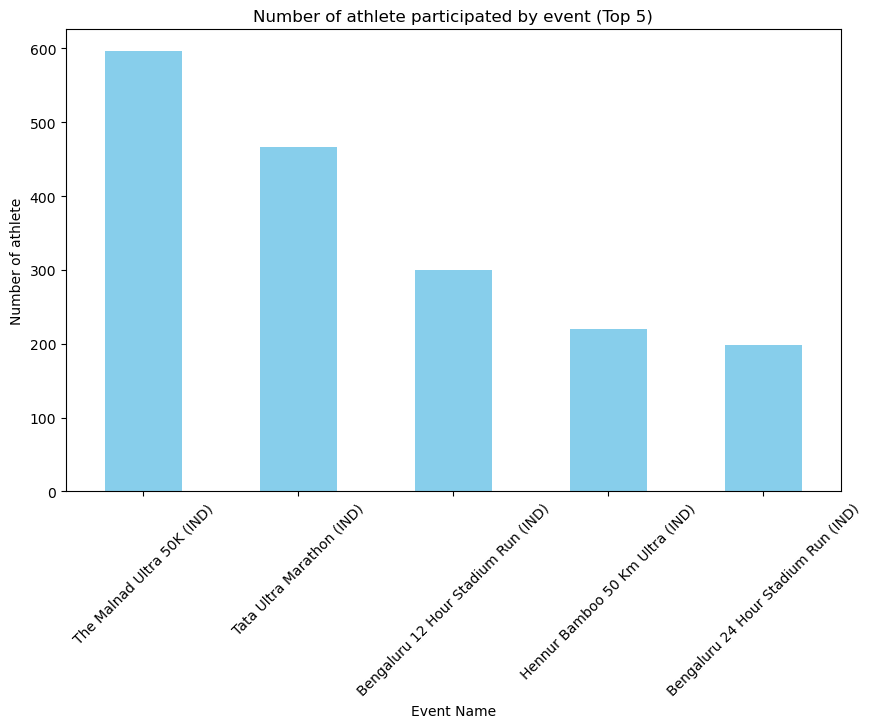

In [28]:
# Number of athlete participated by event (top 5)
df['Event name'].value_counts().head().plot(kind='bar', title='Number of athlete participated by event (Top 5)', xlabel='Event Name',
ylabel='Number of athlete', figsize=(10, 6), color='skyblue')
plt.xticks(rotation=45)

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When groupin

Text(0.5, 1.0, 'Number of athlete participated by gender and event distance/length')

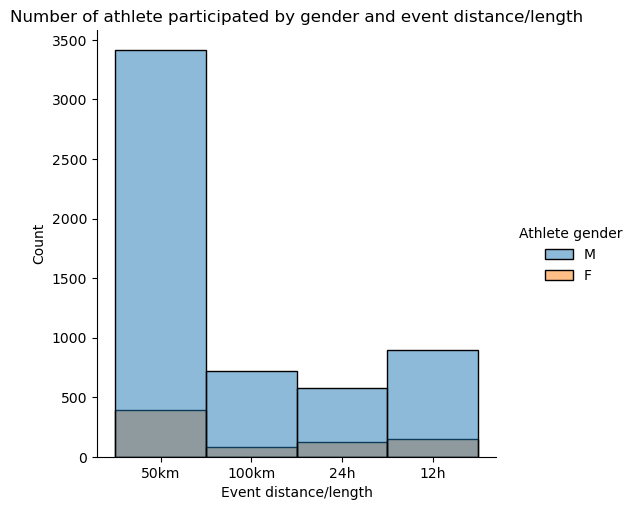

In [29]:
# Number of athlete participated by gender and event distance/length
sns.displot(data=df, kind='hist', x='Event distance/length', hue='Athlete gender')
plt.title('Number of athlete participated by gender and event distance/length')

In [31]:
race_by_gender = pd.crosstab(index=df['Event distance/length'], columns=df['Athlete gender'])
race_by_gender

Athlete gender,F,M
Event distance/length,,
100km,85,719
12h,146,899
24h,122,578
50km,392,3412


c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of athlete age')

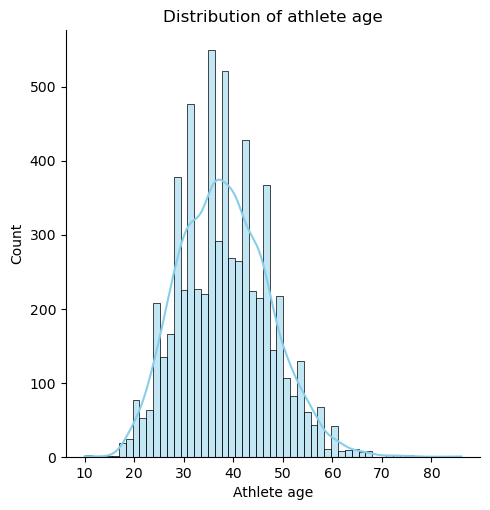

In [32]:
#Distribution of athlete age
sns.displot(data=df, kind='hist', x='Athlete age', color='skyblue', kde=True)
plt.title('Distribution of athlete age')

c:\Users\ACER\ANA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Distribution of athlete average speed')

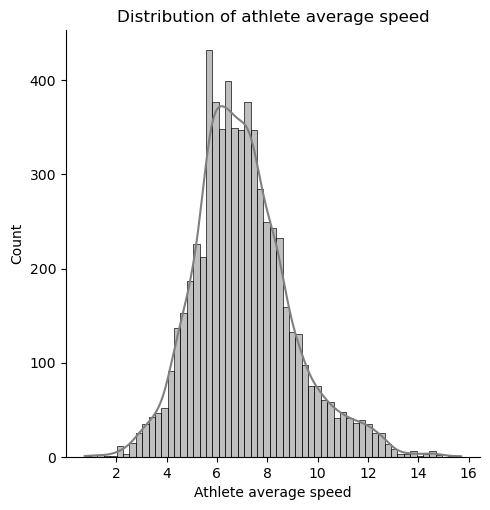

In [33]:
# Distribution of athlete average speed
sns.displot(data=df, kind='hist', x='Athlete average speed', color='grey', kde=True)
plt.title('Distribution of athlete average speed')